## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [241]:
import gzip
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [242]:
!ls 'zippedData'

bom.movie_gross.csv
imdb.name.basics.csv
imdb.title.akas.csv
imdb.title.basics.csv
imdb.title.crew.csv
imdb.title.principals.csv
imdb.title.ratings.csv
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [243]:
#Questions that I am looking to answer: 
#When is the best time of year to release films?
#Is there a correlation between film genres and their release dates?
#How successful (profitable) are film releases during particular quarters?

#store all csv/tsv files as dataframes in order to examine
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv')
title_akas = pd.read_csv('zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv')
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv')
title_principals = pd.read_csv('zippedData/imdb.title.crew.csv')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep = '\t', encoding = 'unicode_escape')
reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep = '\t', encoding = 'unicode_escape')
movies = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [244]:
#display basic info for all dataframes to decide which metrics to use

print(movies_gross.info())
print(name_basics.info())
print(title_akas.info())
print(title_basics.info())
print(title_crew.info())
print(title_principals.info())
print(title_ratings.info())
print(movie_info.info())
print(reviews.info())
print(movies.info())
print(movie_budgets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 


A list of potentially useful metrics to answer my questions:

from movies_gross:
title, domestic_gross, foreign_gross, year

from title_akas:
title_id, title

from title_basics:
primary_title, start_year, genres

title_ratings:
tconst, averagerating, numvotes

from movie_info:
id, rating, genre, theater_date, box_office?

from reviews:
id, rating

from movies:
genre_ids, id, popularity, release_date, title, vote_average

from movie_budgets:
id, release_date, movie, domestic_gross, worldwide_gross

In [245]:
movies_gross_selected = movies_gross[['title', 'domestic_gross', 'foreign_gross', 'year']]


movies_gross_selected.sort_values('year')

movies_gross_selected.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [124]:
title_basics_selected = title_basics[['primary_title', 'start_year', 'genres']]

title_basics_selected.sort_values('start_year')

,primary_title,start_year,genres
9599,Brainiacs in La La Land,2010,Comedy
43264,Fireplace for your Home: Crackling Fireplace w...,2010,Music
11550,Role/Play,2010,"Drama,Romance"
11551,Johan1,2010,"Comedy,Drama,Romance"
11552,Hands Up,2010,Drama
...,...,...,...
2948,Untitled Star Wars Film,2024,NaN
52213,Avatar 4,2025,"Action,Adventure,Fantasy"
2949,Untitled Star Wars Film,2026,Fantasy
96592,Avatar 5,2027,"Action,Adventure,Fantasy"


In [125]:
title_akas_selected = title_akas[['title_id', 'title']]

title_akas_selected

,title_id,title
0,tt0369610,Джурасик свят
1,tt0369610,Jurashikku warudo
2,tt0369610,Jurassic World: O Mundo dos Dinossauros
3,tt0369610,O Mundo dos Dinossauros
4,tt0369610,Jurassic World
...,...,...
331698,tt9827784,Sayonara kuchibiru
331699,tt9827784,Farewell Song
331700,tt9880178,La atención
331701,tt9880178,La atención


In [126]:
title_ratings_selected = title_ratings[['tconst', 'averagerating', 'numvotes']]

title_ratings_selected.sort_values('averagerating', ascending = False)


,tconst,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6
...,...,...,...
50971,tt6017238,1.0,21
32440,tt2087999,1.0,7
36456,tt1896768,1.0,21
54856,tt1976600,1.0,436


In [127]:
movie_info_selected = movie_info[['id', 'rating', 'genre', 'theater_date', 'box_office']]


movie_info_selected.sort_values('theater_date', ascending = False)

movie_info_selected.isna().sum()

id                 0
rating             3
genre              8
theater_date     359
box_office      1220
dtype: int64

In [40]:
reviews_selected = reviews[['id', 'rating']]

In [128]:
movies_selected = movies[['genre_ids', 'id', 'popularity', 'release_date', 'title', 'vote_average']]
movies_selected.sort_values('vote_average', ascending = False)

movies_selected.isna().sum()

genre_ids       0
id              0
popularity      0
release_date    0
title           0
vote_average    0
dtype: int64

In [129]:
#converted all release_date entries in movies_selected to datetime objects
movies_selected['release_datetime'] = movies_selected['release_date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))

<ipython-input-129-f62415152672>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_selected['release_datetime'] = movies_selected['release_date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))


In [130]:
movies_selected_date = movies_selected.sort_values('release_datetime', ascending = False)

In [131]:
#created a dataframe of movies_selected sorted by release date and between the years 2009 and 2019

lower_date_limit = datetime.datetime.strptime('2009-01-01', '%Y-%m-%d')
upper_date_limit = datetime.datetime.strptime('2020-01-01', '%Y-%m-%d')

recent_movies_selected = movies_selected_date.loc[(movies_selected_date['release_datetime'] > lower_date_limit )
                                             & (movies_selected_date['release_datetime'] < upper_date_limit)]

recent_movies_selected

,genre_ids,id,popularity,release_date,title,vote_average,release_datetime
24265,"[10749, 18]",428836,8.715,2019-06-28,Ophelia,0.0,2019-06-28
24892,[99],541577,3.955,2019-06-28,This Changes Everything,0.0,2019-06-28
24819,[18],481880,4.480,2019-05-17,Trial by Fire,7.0,2019-05-17
24297,[18],415085,8.316,2019-05-17,All Creatures Here Below,5.0,2019-05-17
24003,"[18, 9648, 53]",411144,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,2019-05-17
...,...,...,...,...,...,...,...
476,"[35, 18, 10749]",37665,4.390,2009-02-25,Wake,4.8,2009-02-25
3225,[18],68335,2.843,2009-02-18,Now & Later,5.1,2009-02-18
17623,"[28, 16, 36]",13980,9.255,2009-02-05,Sword of the Stranger,7.7,2009-02-05
1193,"[12, 10751, 9648]",24886,1.321,2009-02-05,Minor Details,4.8,2009-02-05


In [132]:
movie_budgets_selected = movie_budgets[['id', 'release_date', 'movie', 'domestic_gross', 'worldwide_gross']]

movie_budgets_selected.sort_values('worldwide_gross', ascending = False)


#created two new columns for cleaned gross domestic and gross worldwide values 
movie_budgets_selected['cleaned_ww_gross'] = movie_budgets_selected['worldwide_gross'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',', '')).astype(np.int64)
movie_budgets_selected['cleaned_domestic_gross'] = movie_budgets_selected['domestic_gross'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',', '')).astype(np.int64)



movie_budgets_selected.head()

,id,release_date,movie,domestic_gross,worldwide_gross,cleaned_ww_gross,cleaned_domestic_gross
0,1,"Dec 18, 2009",Avatar,"$760,507,625","$2,776,345,279",2776345279,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$241,063,875","$1,045,663,875",1045663875,241063875
2,3,"Jun 7, 2019",Dark Phoenix,"$42,762,350","$149,762,350",149762350,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$459,005,868","$1,403,013,963",1403013963,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$620,181,382","$1,316,721,747",1316721747,620181382


In [133]:
type(movie_budgets_selected['release_date'][0])

str

In [134]:
#created a new column for datetime values of the release dates in order to be able to sort and categorize by them


movie_budgets_selected['release_date'] = [date.replace(',', '') for date in movie_budgets_selected['release_date']]
movie_budgets_selected['release_datetime'] = movie_budgets_selected['release_date'].apply(lambda date: datetime.datetime.strptime(date, '%b %d %Y'))

In [135]:
movie_budgets_selected.head()

,id,release_date,movie,domestic_gross,worldwide_gross,cleaned_ww_gross,cleaned_domestic_gross,release_datetime
0,1,Dec 18 2009,Avatar,"$760,507,625","$2,776,345,279",2776345279,760507625,2009-12-18
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,"$241,063,875","$1,045,663,875",1045663875,241063875,2011-05-20
2,3,Jun 7 2019,Dark Phoenix,"$42,762,350","$149,762,350",149762350,42762350,2019-06-07
3,4,May 1 2015,Avengers: Age of Ultron,"$459,005,868","$1,403,013,963",1403013963,459005868,2015-05-01
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,"$620,181,382","$1,316,721,747",1316721747,620181382,2017-12-15


In [167]:
#movie budgets dataframe sorted by most recent release
movie_budgets_date = movie_budgets_selected.sort_values('release_datetime')

In [168]:
#dataframe of movie budgets sorted by release date and between the years 2009 and 2019

lower_date_limit = datetime.datetime.strptime('2009-01-01', '%Y-%m-%d')
upper_date_limit = datetime.datetime.strptime('2020-01-01', '%Y-%m-%d')

recent_movie_budgets = movie_budgets_date.loc[(movie_budgets_date['release_datetime'] > lower_date_limit )
                                             & (movie_budgets_date['release_datetime'] < upper_date_limit)]


In [169]:
recent_movie_budgets.isna().sum()

id                        0
release_date              0
movie                     0
domestic_gross            0
worldwide_gross           0
cleaned_ww_gross          0
cleaned_domestic_gross    0
release_datetime          0
dtype: int64

In [171]:
#added a 'quarter' category to be able to categorize films by the quarter during which they were released

recent_movie_budgets['quarter'] = [datetime.to_period('Q') for datetime in recent_movie_budgets['release_datetime']]

<ipython-input-171-6e1370737454>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_movie_budgets['quarter'] = [datetime.to_period('Q') for datetime in recent_movie_budgets['release_datetime']]


In [253]:
#added a 'release_month' category to be able to count releases by their months
recent_movie_budgets['release_month'] = [date.month for date in recent_movie_budgets['release_datetime']]

<ipython-input-253-618f11c36b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_movie_budgets['release_month'] = [date.month for date in recent_movie_budgets['release_datetime']]


In [254]:
recent_movie_budgets

,id,release_date,movie,domestic_gross,worldwide_gross,cleaned_ww_gross,cleaned_domestic_gross,release_datetime,quarter,q,release_month
4318,19,Jan 9 2009,Not Easily Broken,"$10,572,742","$10,732,909",10732909,10572742,2009-01-09,2009Q1,1,1
1880,81,Jan 9 2009,Bride Wars,"$58,715,510","$115,150,424",115150424,58715510,2009-01-09,2009Q1,1,1
2934,35,Jan 9 2009,The Unborn,"$42,670,410","$78,208,812",78208812,42670410,2009-01-09,2009Q1,1,1
3179,80,Jan 16 2009,My Bloody Valentine,"$51,545,952","$102,836,002",102836002,51545952,2009-01-16,2009Q1,1,1
1164,65,Jan 16 2009,Defiance,"$28,644,813","$52,987,754",52987754,28644813,2009-01-16,2009Q1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2,3,Jun 7 2019,Dark Phoenix,"$42,762,350","$149,762,350",149762350,42762350,2019-06-07,2019Q2,2,6
4534,35,Jun 7 2019,Late Night,"$246,305","$246,305",246305,246305,2019-06-07,2019Q2,2,6
1997,98,Jun 14 2019,Shaft,"$600,000","$600,000",600000,600000,2019-06-14,2019Q2,2,6
341,42,Jun 14 2019,Men in Black: International,"$3,100,000","$3,100,000",3100000,3100000,2019-06-14,2019Q2,2,6


In [269]:
movie_budgets.info()
recent_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 4318 to 1538
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2140 non-null   int64         
 1   release_date            2140 non-null   object        
 2   movie                   2140 non-null   object        
 3   domestic_gross          2140 non-null   object     

In [173]:
#experimenting with grouping by quarter
recent_movie_budgets['q'] = recent_movie_budgets['quarter'].apply(lambda x: str(x)[-1])

<ipython-input-173-f1cbdec83f29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_movie_budgets['q'] = recent_movie_budgets['quarter'].apply(lambda x: str(x)[-1])


In [232]:
recent_movie_budgets.sort_values('cleaned_domestic_gross', ascending = False)

,id,release_date,movie,domestic_gross,worldwide_gross,cleaned_ww_gross,cleaned_domestic_gross,release_datetime,quarter,q
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,"$936,662,225","$2,053,311,220",2053311220,936662225,2015-12-18,2015Q4,4
0,1,Dec 18 2009,Avatar,"$760,507,625","$2,776,345,279",2776345279,760507625,2009-12-18,2009Q4,4
41,42,Feb 16 2018,Black Panther,"$700,059,566","$1,348,258,224",1348258224,700059566,2018-02-16,2018Q1,1
6,7,Apr 27 2018,Avengers: Infinity War,"$678,815,482","$2,048,134,200",2048134200,678815482,2018-04-27,2018Q2,2
33,34,Jun 12 2015,Jurassic World,"$652,270,625","$1,648,854,864",1648854864,652270625,2015-06-12,2015Q2,2
...,...,...,...,...,...,...,...,...,...,...
5748,49,Sep 1 2015,Exeter,$0,"$489,792",489792,0,2015-09-01,2015Q3,3
3161,62,Sep 1 2015,Broken Horses,$0,"$3,471",3471,0,2015-09-01,2015Q3,3
4976,77,Oct 23 2015,Bone Tomahawk,$0,"$475,846",475846,0,2015-10-23,2015Q4,4
4066,67,Nov 20 2015,Criminal Activities,$0,"$386,744",386744,0,2015-11-20,2015Q4,4


In [274]:
#added in 'production_budget' and converted all values to integers
recent_movie_budgets['production_budget'] = movie_budgets['production_budget']
recent_movie_budgets['production_budget'] = recent_movie_budgets['production_budget'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',', '')).astype(np.int64)

#removed any entries with $0 worldwide gross
recent_movie_budgets = recent_movie_budgets[recent_movie_budgets['cleaned_ww_gross'] > 0]

In [282]:
#dropped id column 
recent_movie_budgets.drop('id', axis = 1)

,release_date,movie,domestic_gross,worldwide_gross,cleaned_ww_gross,cleaned_domestic_gross,release_datetime,quarter,q,release_month,production_budget
4318,Jan 9 2009,Not Easily Broken,"$10,572,742","$10,732,909",10732909,10572742,2009-01-09,2009Q1,1,1,5000000
1880,Jan 9 2009,Bride Wars,"$58,715,510","$115,150,424",115150424,58715510,2009-01-09,2009Q1,1,1,30000000
2934,Jan 9 2009,The Unborn,"$42,670,410","$78,208,812",78208812,42670410,2009-01-09,2009Q1,1,1,16000000
3179,Jan 16 2009,My Bloody Valentine,"$51,545,952","$102,836,002",102836002,51545952,2009-01-16,2009Q1,1,1,14000000
1164,Jan 16 2009,Defiance,"$28,644,813","$52,987,754",52987754,28644813,2009-01-16,2009Q1,1,1,50000000
...,...,...,...,...,...,...,...,...,...,...,...
2,Jun 7 2019,Dark Phoenix,"$42,762,350","$149,762,350",149762350,42762350,2019-06-07,2019Q2,2,6,350000000
4534,Jun 7 2019,Late Night,"$246,305","$246,305",246305,246305,2019-06-07,2019Q2,2,6,4000000
1997,Jun 14 2019,Shaft,"$600,000","$600,000",600000,600000,2019-06-14,2019Q2,2,6,30000000
341,Jun 14 2019,Men in Black: International,"$3,100,000","$3,100,000",3100000,3100000,2019-06-14,2019Q2,2,6,110000000


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Film Release Frequency')]

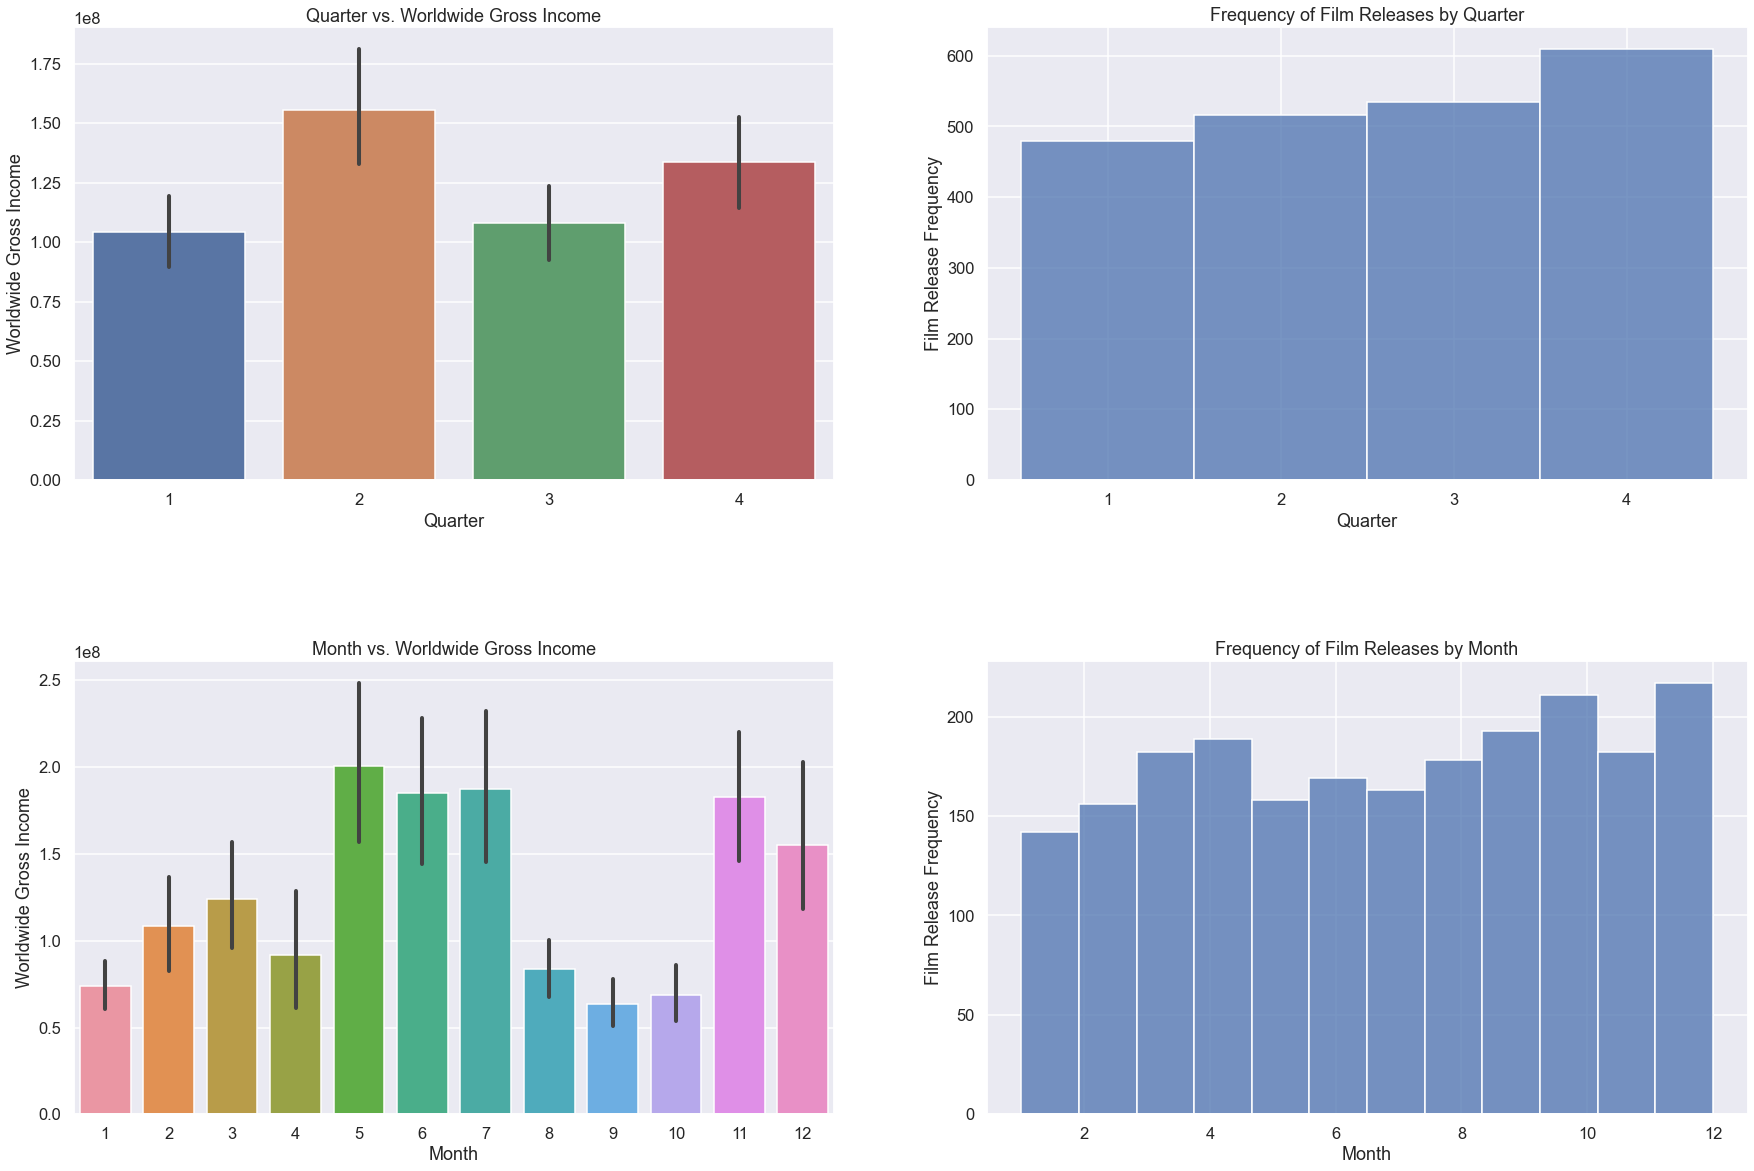

In [271]:
#experimenting with a seaborn visualization of quarters versus worldwide_gross

fig, axes = plt.subplots( 2, 2, figsize = (30,20))
sns.set_theme()
sns.set_context('talk')
plt.subplots_adjust(hspace = .4)


#quarters and months - x values
annual_quarters = recent_movie_budgets['q']
months = recent_movie_budgets['release_month']

#income and release frequencies - y values
worldwidegross = recent_movie_budgets['cleaned_ww_gross']
release_frequency_q = recent_movie_budgets['q'].value_counts()
release_frequency_m = recent_movie_budgets['release_month'].value_counts()

#Plot 1 [0,0]
sns.barplot(ax = axes[0,0], x = annual_quarters, y = worldwidegross)
axes[0,0].set(xlabel="Quarter", ylabel="Worldwide Gross Income")
axes[0,0].set_title("Quarter vs. Worldwide Gross Income")

#Plot 2 [0,1]
sns.histplot(ax = axes[0,1], data = release_frequency_q, x = recent_movie_budgets['q'], bins = 4)
axes[0,1].set_title("Frequency of Film Releases by Quarter")
axes[0,1].set(xlabel = "Quarter", ylabel = "Film Release Frequency")

#Plot 3 [1,0]
sns.barplot(ax = axes[1,0], x = months, y = worldwidegross)
axes[1,0].set(xlabel="Month", ylabel="Worldwide Gross Income")
axes[1,0].set_title("Month vs. Worldwide Gross Income")

#Plot 4 [1,1]
sns.histplot(ax = axes[1,1], data = release_frequency_m, x = recent_movie_budgets['release_month'], bins = 12)
axes[1,1].set_title("Frequency of Film Releases by Month")
axes[1,1].set(xlabel = "Month", ylabel = "Film Release Frequency")